# Setup

In [1]:
#data processing
import pandas as pd

#scale the external data
from sklearn.preprocessing import MinMaxScaler

#data visualization
import matplotlib.pyplot as plt

# plot grahps
import seaborn as sns

# Data Import

In [2]:
# import topic proportions data
df = pd.read_excel("output/topic_distribution.xlsx", index_col = 0)

# import unemployment rate data
df_rate = pd.read_excel("external data/unemploy.xlsx")

# import home prices data
df_hp = pd.read_excel("external data/homeprices.xlsx")

# import military data
df_mil = pd.read_excel("external data/military.xlsx")

# import approval rate data
df_apprate = pd.read_excel("external data/obama approve rate.xlsx")


In [3]:
# Scaling of the data between zero and one. 
# Usage of minmax scaler: 
scaler = MinMaxScaler()

# Scaling of data
df_rate[["rate (%)_scaled"]] = scaler.fit_transform(df_rate[["UNRATE (%)"]])

df_hp[["Homeprice_scaled"]] = scaler.fit_transform(df_hp[["CSUSHPINSA"]])

df_mil[["military_scaled"]] = scaler.fit_transform(df_mil[["Military expenditure (current USD)"]])

df_apprate[["apprate_scaled"]] = scaler.fit_transform(df_apprate[["Approving %"]])

# Unemployment Rate

In [4]:
## Data process
# extract year from date
df_rate['year'] = df_rate['Date'].dt.year.convert_dtypes()

# average unemployment rate per year
df_rate = df_rate.groupby('year', as_index = False).mean().copy()

# merge unemployment rate with topic proportions
df_mer = pd.merge(df, df_rate, how='left',on='year')

# drop the column year
df_2=df_mer.drop(['year'],axis=1)

# calculate the correlation between unemployment rate and different topic proportions 
df_2.corr()

,politics,government role,war and violence,energy and environment,family,health care,international affairs,employment,UNRATE (%),rate (%)_scaled
politics,1.000000,0.527341,0.012560,-0.585066,-0.194343,-0.110725,-0.384479,-0.584514,-0.761765,-0.761765
government role,0.527341,1.000000,0.680695,-0.340578,-0.722408,-0.620753,-0.223950,-0.139711,-0.110481,-0.110481
war and violence,0.012560,0.680695,1.000000,0.260603,-0.946500,-0.692673,0.204305,0.472945,0.501448,0.501448
energy and environment,-0.585066,-0.340578,0.260603,1.000000,-0.265158,-0.258882,0.778531,0.861145,0.806294,0.806294
family,-0.194343,-0.722408,-0.946500,-0.265158,1.000000,0.675865,-0.248065,-0.439093,-0.426949,-0.426949
health care,-0.110725,-0.620753,-0.692673,-0.258882,0.675865,1.000000,0.007321,-0.544698,-0.334711,-0.334711
international affairs,-0.384479,-0.223950,0.204305,0.778531,-0.248065,0.007321,1.000000,0.496591,0.513931,0.513931
employment,-0.584514,-0.139711,0.472945,0.861145,-0.439093,-0.544698,0.496591,1.000000,0.888307,0.888307
UNRATE (%),-0.761765,-0.110481,0.501448,0.806294,-0.426949,-0.334711,0.513931,0.888307,1.000000,1.000000
rate (%)_scaled,-0.761765,-0.110481,0.501448,0.806294,-0.426949,-0.334711,0.513931,0.888307,1.000000,1.000000


# Scaled Unemployment Rate and Topic Distribution Plot

In [5]:
# drop the column of original rate
df_plot1=df_mer.drop(['UNRATE (%)'],axis=1)

# transform data frame from wide to long format
df_plot1 = df_plot1.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#retain the topic whose absolute value of the correlation coefficient is greater than 0.5
fliter = df_plot1["category"].isin(['politics','war and violence','energy and environment','international affairs','employment','rate (%)_scaled'])
df_plot11=df_plot1[fliter]

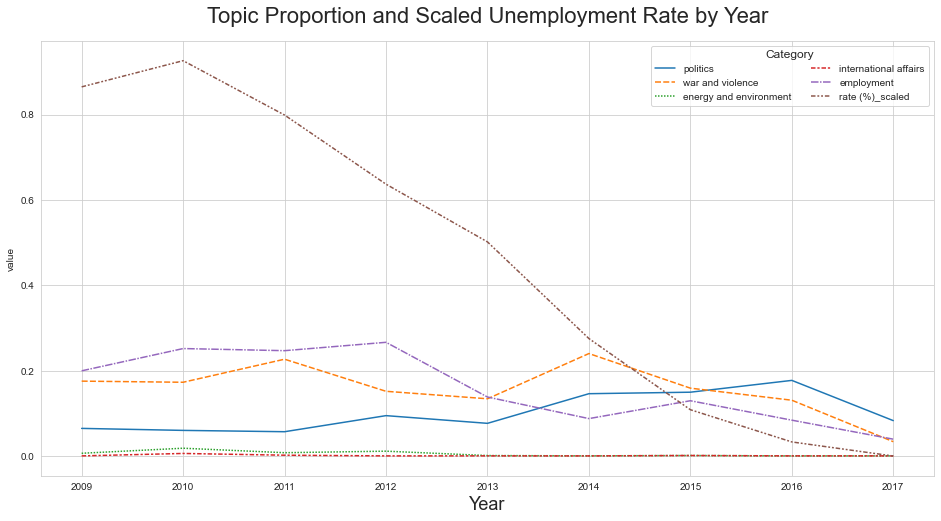

In [6]:
#plot the scaled unemployment rate and different topic proportions 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
correlation1 = sns.lineplot(data = df_plot11, x = "year", y = "value", hue = "category",style="category")
correlation1.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper right', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Topic Proportion and Scaled Unemployment Rate by Year', fontsize = 22, pad = 18)
plt.show()

# Home prices

In [7]:
## Data process
# extract year from date
df_hp ['year'] = df_hp ['Date'].dt.year.convert_dtypes()

# average home prices per year
df_hp = df_hp.groupby('year', as_index = False).mean().copy()

# merge home prices with topic proportions
df_home = pd.merge(df, df_hp, how='left',on='year')

# drop the column year
df_home2 =df_home.drop(['year'],axis=1)

# calculate the correlation between home prices and different topic proportions
df_home2.corr()

,politics,government role,war and violence,energy and environment,family,health care,international affairs,employment,CSUSHPINSA,Homeprice_scaled
politics,1.000000,0.527341,0.012560,-0.585066,-0.194343,-0.110725,-0.384479,-0.584514,0.670518,0.670518
government role,0.527341,1.000000,0.680695,-0.340578,-0.722408,-0.620753,-0.223950,-0.139711,0.096485,0.096485
war and violence,0.012560,0.680695,1.000000,0.260603,-0.946500,-0.692673,0.204305,0.472945,-0.583008,-0.583008
energy and environment,-0.585066,-0.340578,0.260603,1.000000,-0.265158,-0.258882,0.778531,0.861145,-0.748365,-0.748365
family,-0.194343,-0.722408,-0.946500,-0.265158,1.000000,0.675865,-0.248065,-0.439093,0.481718,0.481718
health care,-0.110725,-0.620753,-0.692673,-0.258882,0.675865,1.000000,0.007321,-0.544698,0.455826,0.455826
international affairs,-0.384479,-0.223950,0.204305,0.778531,-0.248065,0.007321,1.000000,0.496591,-0.380903,-0.380903
employment,-0.584514,-0.139711,0.472945,0.861145,-0.439093,-0.544698,0.496591,1.000000,-0.937473,-0.937473
CSUSHPINSA,0.670518,0.096485,-0.583008,-0.748365,0.481718,0.455826,-0.380903,-0.937473,1.000000,1.000000
Homeprice_scaled,0.670518,0.096485,-0.583008,-0.748365,0.481718,0.455826,-0.380903,-0.937473,1.000000,1.000000


# Scaled Home Prices and Topic Distribution Plot

In [8]:
# drop the column of original home prices
df_plothome=df_home.drop(['CSUSHPINSA'],axis=1)

# transform data frame from wide to long format
df_plothome = df_plothome.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#retain the topic whose absolute value of the correlation coefficient is greater than 0.5
fliter = df_plothome["category"].isin(['politics','war and violence','energy and environment','employment','Homeprice_scaled'])
df_plothome1=df_plothome[fliter]

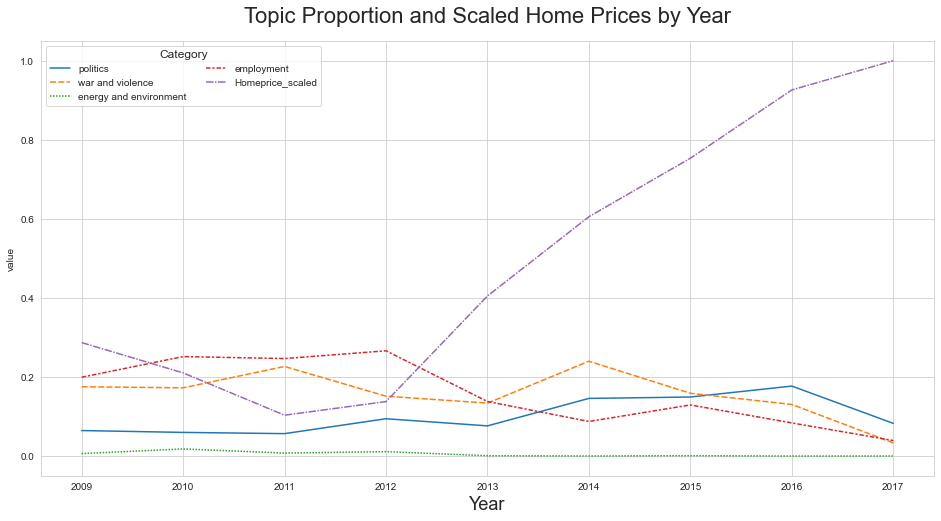

In [9]:
#plot the scaled home prices and different topic proportions
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
correlation2 = sns.lineplot(data = df_plothome1, x = "year", y = "value", hue = "category",style="category")
correlation2.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper left', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Topic Proportion and Scaled Home Prices by Year', fontsize = 22, pad = 18)
plt.show()

# Military Expenditure

In [10]:
##Data process
# merge home prices with topic proportions
df_milexp = pd.merge(df, df_mil, how='left',on='year')

# drop the column year
df_milexp1 =df_milexp.drop(['year'],axis=1)

# calculate the correlation between military expenditure and different topic proportions 
df_milexp1.corr()

,politics,government role,war and violence,energy and environment,family,health care,international affairs,employment,Military expenditure (current USD),military_scaled
politics,1.000000,0.527341,0.012560,-0.585066,-0.194343,-0.110725,-0.384479,-0.584514,-0.782696,-0.782696
government role,0.527341,1.000000,0.680695,-0.340578,-0.722408,-0.620753,-0.223950,-0.139711,-0.258152,-0.258152
war and violence,0.012560,0.680695,1.000000,0.260603,-0.946500,-0.692673,0.204305,0.472945,0.386810,0.386810
energy and environment,-0.585066,-0.340578,0.260603,1.000000,-0.265158,-0.258882,0.778531,0.861145,0.838324,0.838324
family,-0.194343,-0.722408,-0.946500,-0.265158,1.000000,0.675865,-0.248065,-0.439093,-0.267730,-0.267730
health care,-0.110725,-0.620753,-0.692673,-0.258882,0.675865,1.000000,0.007321,-0.544698,-0.383249,-0.383249
international affairs,-0.384479,-0.223950,0.204305,0.778531,-0.248065,0.007321,1.000000,0.496591,0.515859,0.515859
employment,-0.584514,-0.139711,0.472945,0.861145,-0.439093,-0.544698,0.496591,1.000000,0.918615,0.918615
Military expenditure (current USD),-0.782696,-0.258152,0.386810,0.838324,-0.267730,-0.383249,0.515859,0.918615,1.000000,1.000000
military_scaled,-0.782696,-0.258152,0.386810,0.838324,-0.267730,-0.383249,0.515859,0.918615,1.000000,1.000000


# Scaled Military Expenditure and Topic Distribution Plot

In [11]:
# drop the column of original military data
df_plotmil=df_milexp.drop(['Military expenditure (current USD)'],axis=1)

# transform data frame from wide to long format
df_plotmil = df_plotmil.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#retain the topic whose absolute value of the correlation coefficient is greater than 0.5
fliter = df_plotmil["category"].isin(['politics','energy and environment','international affairs','employment','military_scaled'])
df_plotmil1=df_plotmil[fliter]

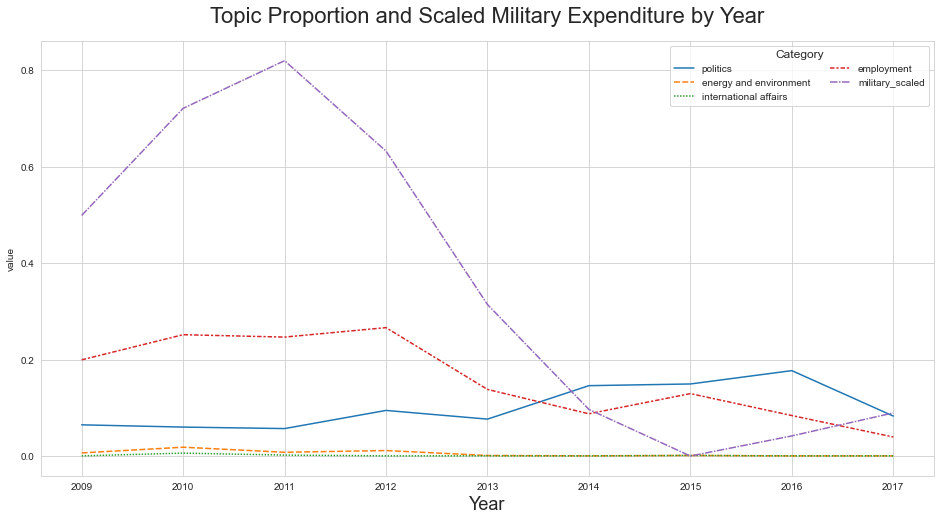

In [12]:
#plot the scaled home prices and different topic proportions 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
correlation3 = sns.lineplot(data = df_plotmil1, x = "year", y = "value", hue = "category",style="category")
correlation3.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper right', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Topic Proportion and Scaled Military Expenditure by Year', fontsize = 22, pad = 18)
plt.show()

# Approval Rate

In [13]:
## Data process
# merge approval rating with topic proportions
df_appratemer = pd.merge(df, df_apprate, how='left',on='year')

# drop the column year
df_appratemer1 =df_appratemer.drop(['year'],axis=1)

# calculate the correlation between military expenditure and different topic proportions 
df_appratemer1.corr()

,politics,government role,war and violence,energy and environment,family,health care,international affairs,employment,Approving %,apprate_scaled
politics,1.000000,0.527341,0.012560,-0.585066,-0.194343,-0.110725,-0.384479,-0.584514,-0.185915,-0.185915
government role,0.527341,1.000000,0.680695,-0.340578,-0.722408,-0.620753,-0.223950,-0.139711,-0.247705,-0.247705
war and violence,0.012560,0.680695,1.000000,0.260603,-0.946500,-0.692673,0.204305,0.472945,-0.657551,-0.657551
energy and environment,-0.585066,-0.340578,0.260603,1.000000,-0.265158,-0.258882,0.778531,0.861145,-0.120870,-0.120870
family,-0.194343,-0.722408,-0.946500,-0.265158,1.000000,0.675865,-0.248065,-0.439093,0.609899,0.609899
health care,-0.110725,-0.620753,-0.692673,-0.258882,0.675865,1.000000,0.007321,-0.544698,0.278987,0.278987
international affairs,-0.384479,-0.223950,0.204305,0.778531,-0.248065,0.007321,1.000000,0.496591,-0.257900,-0.257900
employment,-0.584514,-0.139711,0.472945,0.861145,-0.439093,-0.544698,0.496591,1.000000,-0.239191,-0.239191
Approving %,-0.185915,-0.247705,-0.657551,-0.120870,0.609899,0.278987,-0.257900,-0.239191,1.000000,1.000000
apprate_scaled,-0.185915,-0.247705,-0.657551,-0.120870,0.609899,0.278987,-0.257900,-0.239191,1.000000,1.000000


# Scaled Approval Rate and Topic Distribution Plot

In [14]:
# drop the column of original approval rate data
df_plotappr=df_appratemer.drop(['Approving %'],axis=1)

# transform data frame from wide to long format
df_plotappr = df_plotappr.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#retain the topic whose absolute value of the correlation coefficient is greater than 0.5
fliter = df_plotappr["category"].isin(['war and violence','family','apprate_scaled'])
df_plotappr1=df_plotappr[fliter]

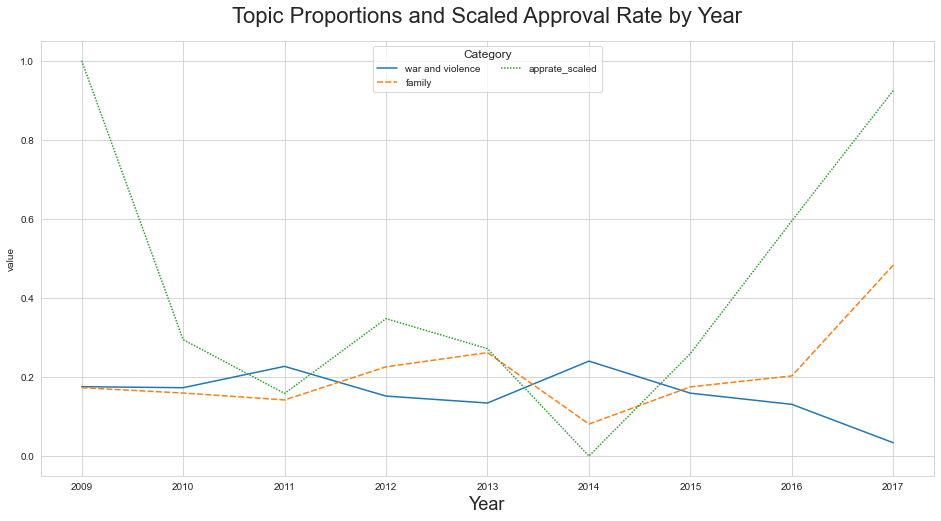

In [15]:
#plot the scaled approval rate and different topic proportions
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
correlation4 = sns.lineplot(data = df_plotappr1, x = "year", y = "value", hue = "category",style="category")
correlation4.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper center', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Topic Proportions and Scaled Approval Rate by Year', fontsize = 22, pad = 18)
plt.show()